96
86
[[ 6.43326296e-04]
 [ 3.98694390e-10]
 [ 3.48240447e-12]
 [ 8.85694588e-14]
 [-2.47953425e-26]
 [ 1.65306382e-18]
 [-4.24820191e-26]]
[[  3.1915687 ]
 [  9.39935988]
 [ 11.45812079]
 [ 13.05271601]
 [-25.60562989]
 [ 17.78171038]
 [-25.37179485]]


/tmp/ipykernel_33/3668407647.py:48: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  huMoments1[i] = -1* (math.copysign(1.0, huMoments[i])) * math.log10(abs(huMoments[i]))


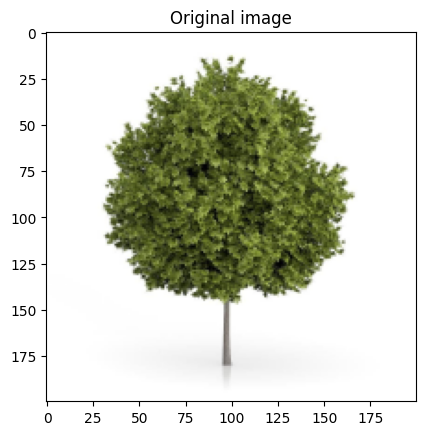

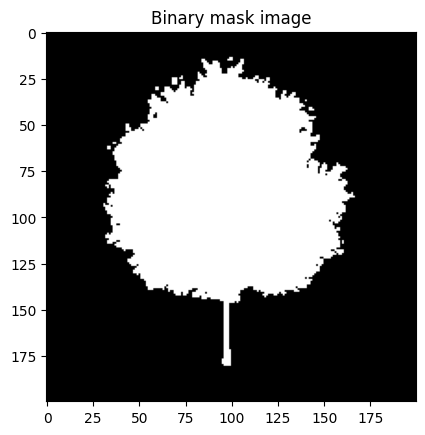

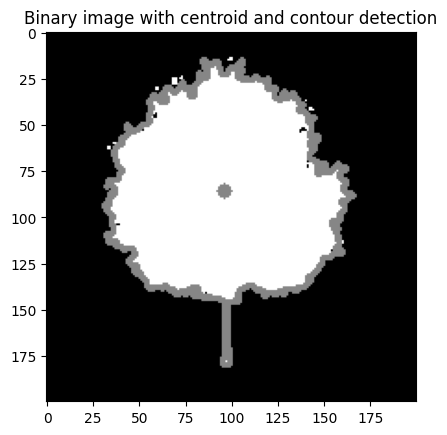

In [1]:
# this code is for conversion of image to binary image and apply invariant moments technique on the converted image
# for seven moments computation using log transformation
import cv2
import matplotlib.pyplot as plt
import math
import statistics
import numpy as np
img = cv2.imread('../input/tree-shaped-networks/Tree-Shaped Networks/TrainTrees/Round/bc86.jpg')
img= cv2.resize(img, (200,200), interpolation = cv2.INTER_AREA)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure('figure 1')
plt.imshow(img)
plt.title('Original image')
imgblur = cv2.bilateralFilter(img, d = 7, 
                              sigmaSpace = 75, sigmaColor =75)
# Convert to grayscale 
imggray = cv2.cvtColor(imgblur, cv2.COLOR_RGB2GRAY)
# Apply the thresholding
a = imggray.max()  
_, thresh = cv2.threshold(imggray, a/2+60, a,cv2.THRESH_BINARY_INV)
plt.figure('figure 2')
plt.imshow(thresh, cmap = 'gray')
plt.title('Binary mask image')
moments = cv2.moments(thresh)
# Find contours
cnts = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
c = max(cnts, key=cv2.contourArea)
# Draw the contour 
cv2.drawContours(thresh, [c],-1,(134, 105, 175),2)
# find and draw the center of the shape on the image
M = cv2.moments(c)
cx = int(M["m10"] / M["m00"])
print(cx)
cy = int(M["m01"] / M["m00"])
print(cy)
cv2.circle(thresh, (cx, cy), 4, (134, 105, 175), -1)
plt.figure('figure 3')
plt.imshow(thresh, cmap = 'gray')
plt.title('Binary image with centroid and contour detection')
#................................................ invariant moments technique
# Calculate Hu seven Moments of the image
huMoments = cv2.HuMoments(moments)
print(huMoments)
#Apply log transformation
huMoments1=np.zeros((7,1))
for i in range(0,7):
    huMoments1[i] = -1* (math.copysign(1.0, huMoments[i])) * math.log10(abs(huMoments[i]))  
print(huMoments1)

